# Convert an Image to its HSI.
##### Increase S by 40%
##### Decrease S by 30%

<ipython-input-20-101595a29b1f>:27: RuntimeWarning: invalid value encountered in sqrt
  den = (np.sqrt((r-g)**2+(r-g)*(g-b)+1e-5))


Text(0.5, 1.0, 'HSI Image')

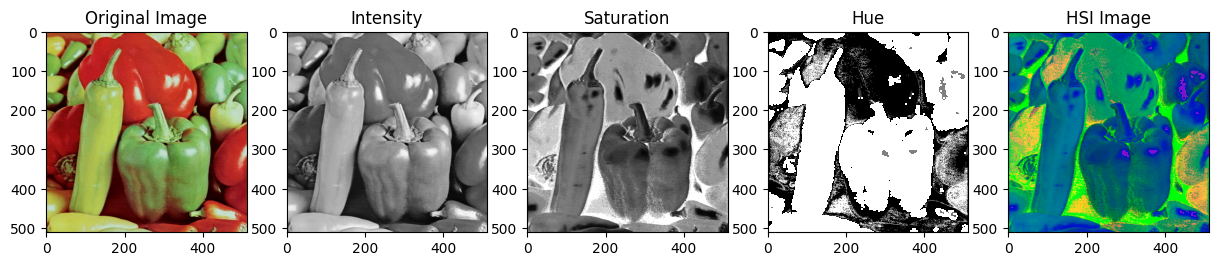

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(15,15))
image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/peppers_color.tif')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)


r,g,b=cv2.split(image1)
r=r.astype(np.float32)
g=g.astype(np.float32)
b=b.astype(np.float32)

#intensity
intensity=(r+g+b)/3
intensity=intensity/255.0

#saturation
saturation=1-(3 * (np.minimum(np.minimum(r,g),b))/(r+g+b+1e-5))
#saturation=1-3*((np.minimum(np.minimum(r,g),b))//(r+g+b+1e-5))
#saturation=saturation/255.0

#hue
#theta=np.arccos((0.5*((r-g)+(r-b)))//(np.sqrt((r-g)**2+(r-g)*(g-b)+1e-5)))
num = (0.5*((r-g)+(r-b)))
den = (np.sqrt((r-g)**2+(r-g)*(g-b)+1e-5))
theta=np.arccos(np.clip(num/den, -1, 1))

#if(b<=g):
#  hue=theta
#else:
#  hue=2*np.pi - theta

hue=np.where(b<=g, theta, 2*np.pi-theta)
hue=hue/(2*np.pi)
#hue=hue/255.0
hsi=cv2.merge((hue,saturation,intensity))


fig.add_subplot(151)
plt.imshow(image1)
plt.title("Original Image")

fig.add_subplot(152)
plt.imshow(intensity,cmap='gray')
plt.title("Intensity")

fig.add_subplot(153)
plt.imshow(saturation,cmap='gray')
plt.title("Saturation")

fig.add_subplot(154)
plt.imshow(hue,cmap='gray')
plt.title("Hue")

fig.add_subplot(155)
plt.imshow(np.clip(hsi, 0, 1))
plt.title("HSI Image")

Text(0.5, 1.0, '30% less Saturation')

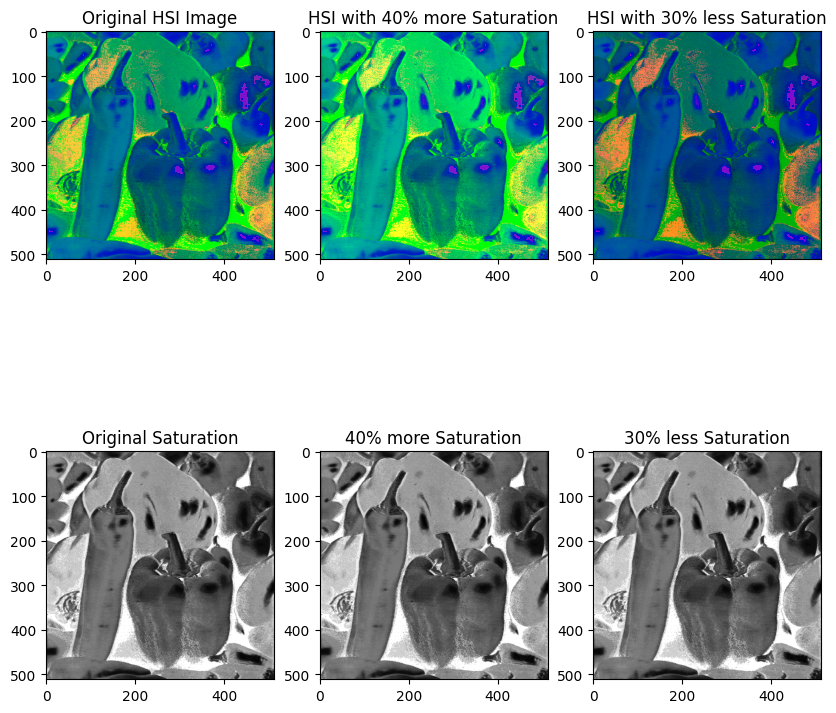

In [ ]:
fig=plt.figure(figsize=(10,10))
#increasing saturation by 40%
s1=saturation*1.4
#decreasing saturation by 30%
s2=saturation*0.7

hsi1=cv2.merge((hue,s1,intensity))
hsi2=cv2.merge((hue,s2,intensity))

fig.add_subplot(231)
plt.imshow(np.clip(hsi,0,1))
plt.title("Original HSI Image")

fig.add_subplot(232)
plt.imshow(np.clip(hsi1, 0, 1))
plt.title("HSI with 40% more Saturation")

fig.add_subplot(233)
plt.imshow(np.clip(hsi2, 0, 1))
plt.title("HSI with 30% less Saturation")

fig.add_subplot(234)
plt.imshow(saturation,cmap='gray')
plt.title("Original Saturation")

fig.add_subplot(235)
plt.imshow(s1,cmap='gray')
plt.title("40% more Saturation")

fig.add_subplot(236)
plt.imshow(s2,cmap='gray')
plt.title("30% less Saturation")
